In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/240701_kinker_anndata.h5ad')
adata

AnnData object with n_obs × n_vars = 53513 × 23081
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes'
    var: 'n_cells'

In [7]:
!pip install leidenalg
import leidenalg

  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/82/90/0b9525098a7458939f5c2b956ffdc1fed460c0fe706f549087c3b0d12b81/leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for igraph<0.12,>=0.10.0 from https://files.pythonhosted.org/packages/e4/3b/5cf3b131d433dea61608ea2c27bebf74de9cc7a50ced0b26311d6288294e/igraph-0.11.6-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for texttable>=1.6.2 from https://files.pythonhosted.org/packages/24/99/4772b8e00a136f3e01236de33b0efda31ee7077203ba5967fcc76da94d65/texttable-1.7.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.4 MB/s eta 0:00:00a 0:00:01


In [4]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    #normalize data
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    #log the data
    sc.pp.log1p(adata)
    
    #annotating highly variable genes
    #reproducing R-implementation of Seurat
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    
    #sc.pp.scale(adata, max_value=10)
    
    #computing PCA coordinates
    sc.tl.pca(adata, svd_solver='arpack')
    
    #computes the nearest neighbors distance matrix and a neighborhood graph of observations
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    
    #umap compute for viz multi-dimension scrna gene exp data
    sc.tl.umap(adata, random_state=random_state)
    
    #clustering
    sc.tl.leiden(adata, random_state=random_state)
    
    return adata

In [5]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

In [6]:
adata

AnnData object with n_obs × n_vars = 53513 × 23081
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/maitreepatel/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


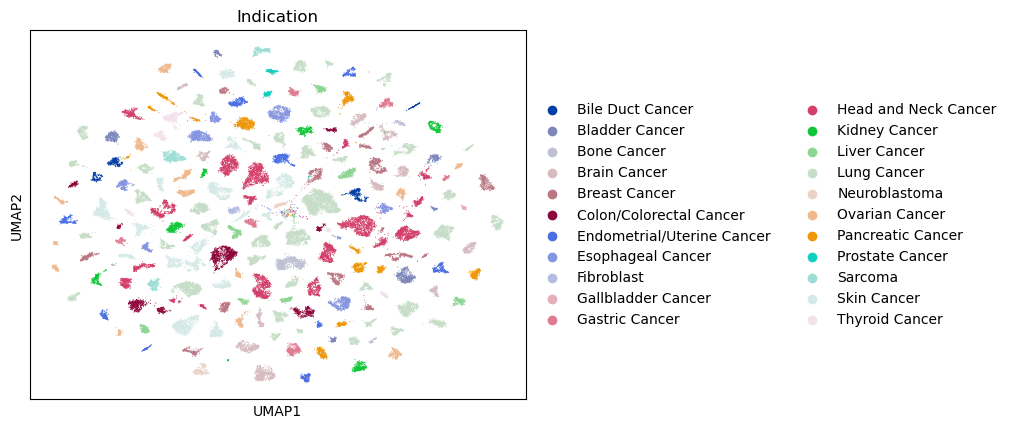

In [7]:
sc.pl.umap(adata, color=['Indication'])

In [8]:
adata.layers["counts"] = adata.X.copy()

In [9]:
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

In [13]:
#print(*adata.var_names)

**Using available scRNA-seq data from cancer cell lines, how would you explore the use of the following FDA-approved antibody therapies in additional cancers?**

**Trastuzumab:** Targets HER2 and is used in the treatment of HER2-positive breast and gastric cancers.
- ERBB2 gene encodes for HER2 (HER2 protein promotes cancer cell growth).
- ERBB3 gene (a.k.a HER3) is a HER receptor that dimerizes with HER2, activating it.
- trastuzumab binds to this heterodimer.
- Genes responsible for trastuzumab resistance includes PIK3CA and CDK12 (Wang et al., 2022, p. XXXX) 

**Bevacizumab:** Targets VEGF and is used for a variety of cancers, including colorectal, lung, glioblastoma, breast, liver, and kidney cancer.



In [10]:
#subsetting observations from ERBB2, VEGFA, VEGFB genes
df = sc.get.obs_df(adata, keys=["ERBB2", "VEGFA", "VEGFB", "ERBB3", "PIK3CA", "CDK12"], layer="log2_counts")

In [11]:
df

,ERBB2,VEGFA,VEGFB,ERBB3,PIK3CA,CDK12
AAACCTGAGACATAAC-1-18,0.000000,0.381903,0.618537,0.000000,0.000000,0.618537
AAACCTGCACAACGCC-1-18,0.000000,0.664748,0.000000,0.000000,0.664748,0.000000
AAACCTGCAGACAAGC-1-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.980714
AAACCTGCAGCTCGAC-1-18,0.000000,0.906552,0.000000,0.000000,0.000000,0.000000
AAACCTGCATGGATGG-1-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
c4788,0.000000,0.000000,0.220531,0.000000,0.000000,0.000000
c4789,0.000000,0.000000,0.000000,0.000000,0.000000,0.486993
c4793,0.497375,0.767569,0.000000,0.497375,0.497375,0.000000
c4800,0.000000,0.000000,0.000000,0.000000,0.438744,0.000000


In [12]:
#adding indication columns from anndata
df["Indication"] = adata.obs["Indication"]

## Expression of ERBB2 among Cell Lines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

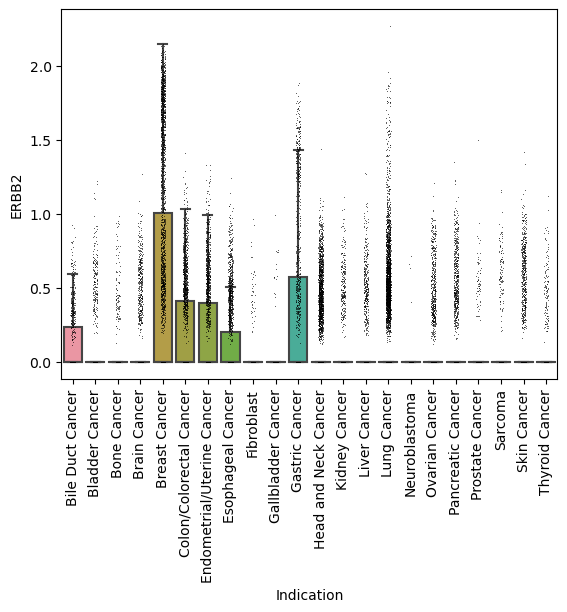

In [16]:
sns.boxplot(data=df, x="Indication", y="ERBB2", showfliers=False)
sns.stripplot(data=df, x='Indication', y='ERBB2', color='black', size=0.5, jitter=True, )
plt.xticks(rotation=90)

### ERBB2 Expression among Breast Cancer Cell Lines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BT474_BREAST'),
  Text(1, 0, 'BT549_BREAST'),
  Text(2, 0, 'CAMA1_BREAST'),
  Text(3, 0, 'EFM192A_BREAST'),
  Text(4, 0, 'HCC38_BREAST'),
  Text(5, 0, 'HCC1419_BREAST'),
  Text(6, 0, 'HCC1428_BREAST'),
  Text(7, 0, 'HDQP1_BREAST'),
  Text(8, 0, 'HMC18_BREAST'),
  Text(9, 0, 'KPL1_BREAST'),
  Text(10, 0, 'MCF7_BREAST'),
  Text(11, 0, 'MDAMB361_BREAST'),
  Text(12, 0, 'MDAMB436_BREAST'),
  Text(13, 0, 'T47D_BREAST'),
  Text(14, 0, 'ZR751_BREAST')])

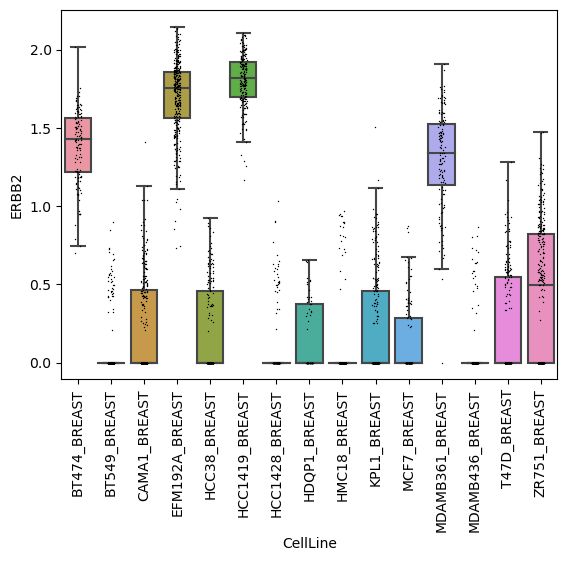

In [26]:
#selecting genes with breast cancer indication
adata_breast = adata[adata.obs.Indication=='Breast Cancer'].copy()
df_breast = sc.get.obs_df(adata_breast, keys=['ERBB2', 'ERBB3', 'VEGFA', 'VEGFB'], layer='log2_counts')
df_breast['CellLine'] = adata_breast.obs['CellLine']

#visualizing based on cell line
sns.boxplot(data=df_breast, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df_breast, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BT474_BREAST'),
  Text(1, 0, 'BT549_BREAST'),
  Text(2, 0, 'CAMA1_BREAST'),
  Text(3, 0, 'EFM192A_BREAST'),
  Text(4, 0, 'HCC38_BREAST'),
  Text(5, 0, 'HCC1419_BREAST'),
  Text(6, 0, 'HCC1428_BREAST'),
  Text(7, 0, 'HDQP1_BREAST'),
  Text(8, 0, 'HMC18_BREAST'),
  Text(9, 0, 'KPL1_BREAST'),
  Text(10, 0, 'MCF7_BREAST'),
  Text(11, 0, 'MDAMB361_BREAST'),
  Text(12, 0, 'MDAMB436_BREAST'),
  Text(13, 0, 'T47D_BREAST'),
  Text(14, 0, 'ZR751_BREAST')])

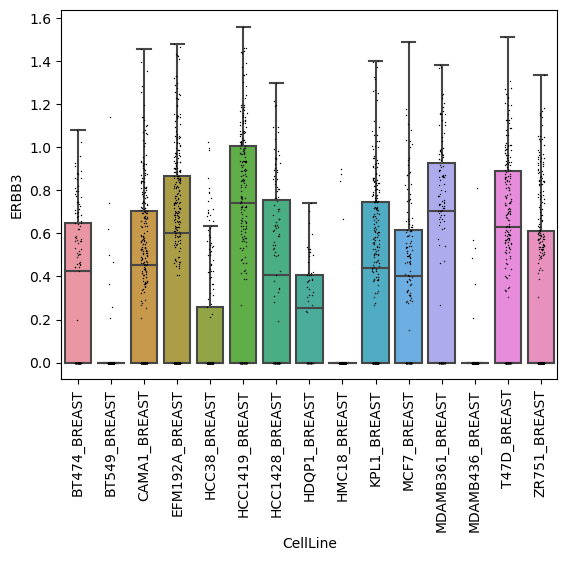

In [27]:
sns.boxplot(data=df_breast, x='CellLine', y='ERBB3', showfliers=False)
sns.stripplot(data=df_breast, x='CellLine', y='ERBB3', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

/Users/maitreepatel/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


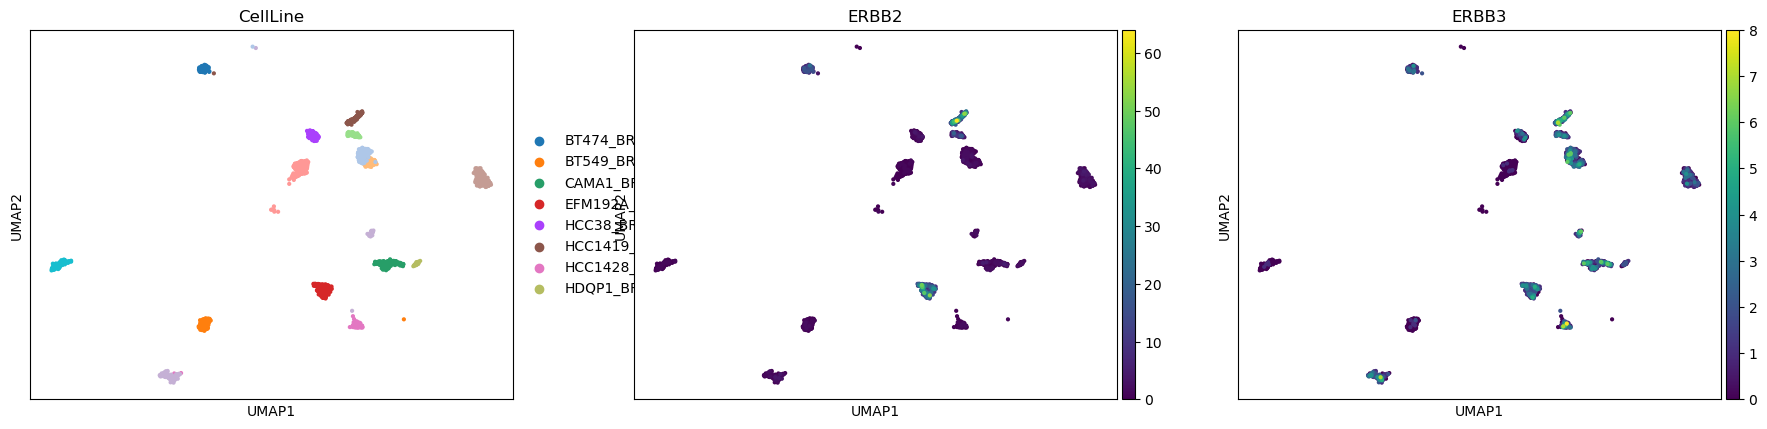

In [21]:
sc.pl.umap(adata_breast, color=["CellLine","ERBB2", "ERBB3"])

### ERBB2 Expression among Gastric Cancer Cell Lines

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2313287_STOMACH'),
  Text(1, 0, 'IM95_STOMACH'),
  Text(2, 0, 'LMSU_STOMACH'),
  Text(3, 0, 'MKN7_STOMACH'),
  Text(4, 0, 'MKN45_STOMACH'),
  Text(5, 0, 'SH10TC_STOMACH')])

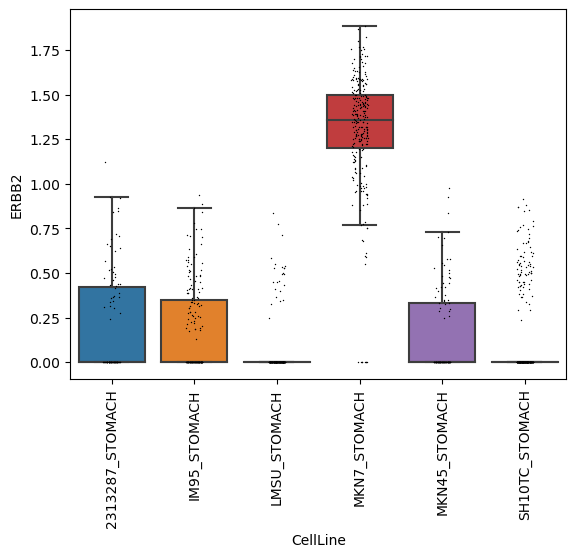

In [29]:
adata_gastric = adata[adata.obs.Indication=="Gastric Cancer"].copy() #returns copy of a list
df_gastric = sc.get.obs_df(adata_gastric, keys=["ERBB2", "ERBB3" ,"VEGFA", "VEGFB"], layer="log2_counts")
df_gastric['CellLine'] = adata_gastric.obs['CellLine']

sns.boxplot(data=df_gastric, x="CellLine", y="ERBB2", showfliers=False)
sns.stripplot(data=df_gastric, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2313287_STOMACH'),
  Text(1, 0, 'IM95_STOMACH'),
  Text(2, 0, 'LMSU_STOMACH'),
  Text(3, 0, 'MKN7_STOMACH'),
  Text(4, 0, 'MKN45_STOMACH'),
  Text(5, 0, 'SH10TC_STOMACH')])

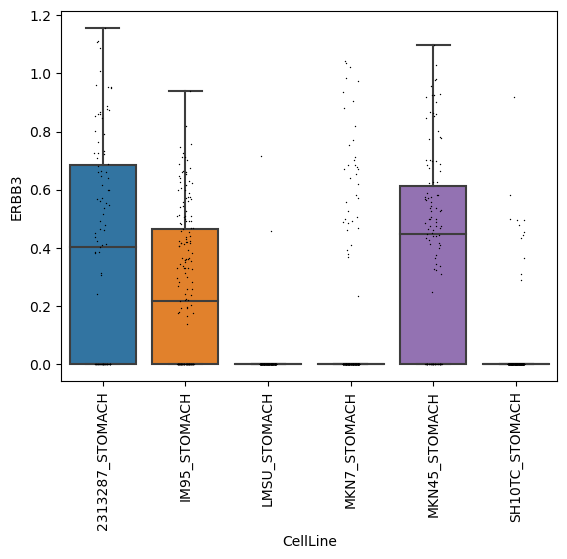

In [31]:
sns.boxplot(data=df_gastric, x="CellLine", y="ERBB3", showfliers=False)
sns.stripplot(data=df_gastric, x="CellLine", y="ERBB3", color="black", size=1, jitter=True)
plt.xticks(rotation=90)

/Users/maitreepatel/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


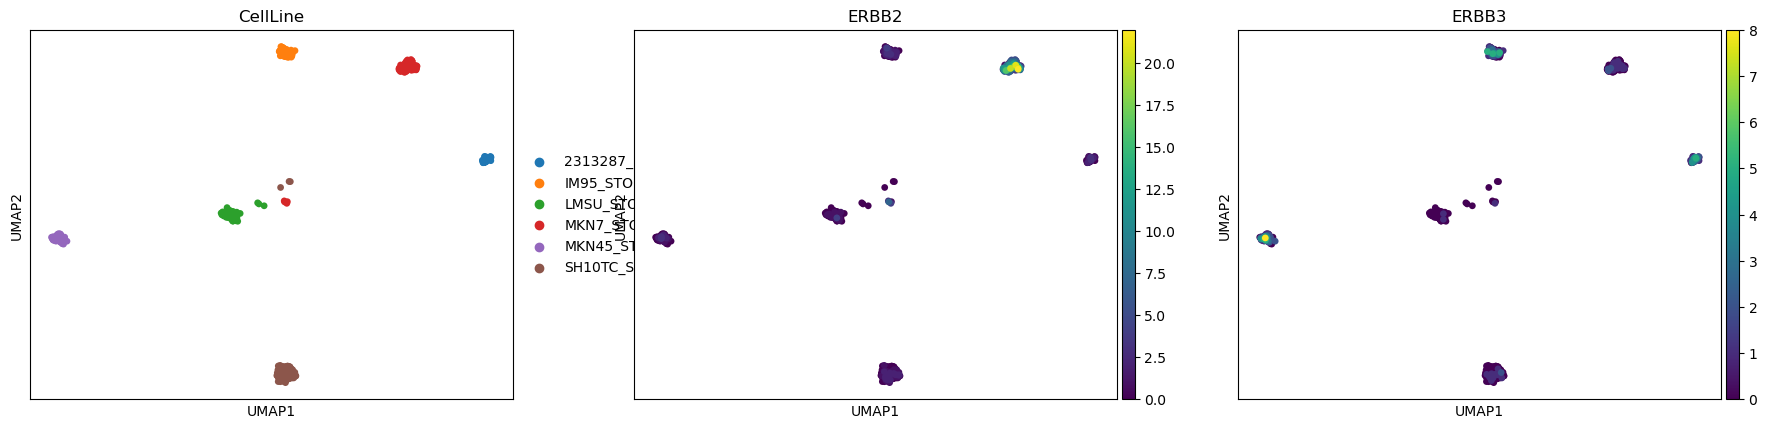

In [34]:
sc.pl.umap(adata_gastric, color=["CellLine", "ERBB2", "ERBB3"])

### ERBB2 Expression among Lung Cancer Cell Lines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'ABC1_LUNG'),
  Text(1, 0, 'ACCMESO1_PLEURA'),
  Text(2, 0, 'CALU6_LUNG'),
  Text(3, 0, 'EBC1_LUNG'),
  Text(4, 0, 'EKVX_LUNG'),
  Text(5, 0, 'HCC366_LUNG'),
  Text(6, 0, 'IALM_LUNG'),
  Text(7, 0, 'MSTO211H_PLEURA'),
  Text(8, 0, 'NCIH226_LUNG'),
  Text(9, 0, 'NCIH292_LUNG'),
  Text(10, 0, 'NCIH358_LUNG'),
  Text(11, 0, 'NCIH446_LUNG'),
  Text(12, 0, 'NCIH460_LUNG'),
  Text(13, 0, 'NCIH522_LUNG'),
  Text(14, 0, 'NCIH650_LUNG'),
  Text(15, 0, 'NCIH727_LUNG'),
  Text(16, 0, 'NCIH1048_LUNG'),
  Text(17, 0, 'NCIH1299_LUNG'),
  Text(18, 0, 'NCIH1373_LUNG'),
  Text(19, 0, 'NCIH1435_LUNG'),
  Text(20, 0, 'NCIH1568_LUNG'),
  Text(21, 0, 'NCIH1792_LUNG'),
  Text(22, 0, 'NCIH1944_LUNG'),
  Text(23, 0, 'NCIH2073_LUNG'),
  Text(24, 0, 'NCIH2077_LUNG'),
  Text(25, 0, 'NCIH2087_LUNG'),
  Text(26, 0, 'NC

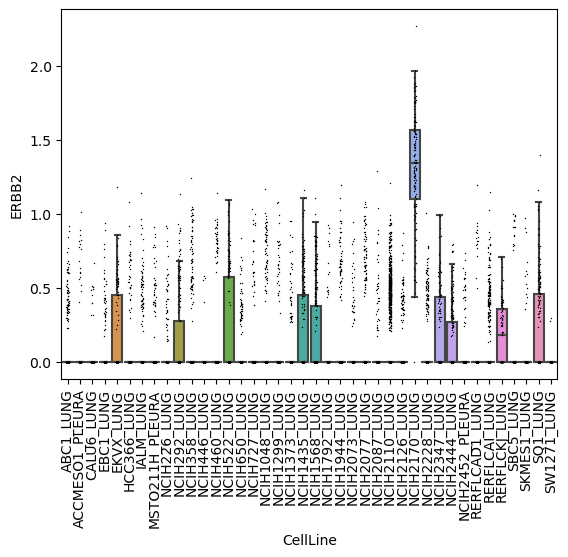

In [37]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df_lung = sc.get.obs_df(adata_lung, keys=['ERBB2','ERBB3' , 'VEGFA', 'VEGFB'], layer='log2_counts')
df_lung['CellLine'] = adata_lung.obs['CellLine']
sns.boxplot(data=df_lung, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df_lung, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'ABC1_LUNG'),
  Text(1, 0, 'ACCMESO1_PLEURA'),
  Text(2, 0, 'CALU6_LUNG'),
  Text(3, 0, 'EBC1_LUNG'),
  Text(4, 0, 'EKVX_LUNG'),
  Text(5, 0, 'HCC366_LUNG'),
  Text(6, 0, 'IALM_LUNG'),
  Text(7, 0, 'MSTO211H_PLEURA'),
  Text(8, 0, 'NCIH226_LUNG'),
  Text(9, 0, 'NCIH292_LUNG'),
  Text(10, 0, 'NCIH358_LUNG'),
  Text(11, 0, 'NCIH446_LUNG'),
  Text(12, 0, 'NCIH460_LUNG'),
  Text(13, 0, 'NCIH522_LUNG'),
  Text(14, 0, 'NCIH650_LUNG'),
  Text(15, 0, 'NCIH727_LUNG'),
  Text(16, 0, 'NCIH1048_LUNG'),
  Text(17, 0, 'NCIH1299_LUNG'),
  Text(18, 0, 'NCIH1373_LUNG'),
  Text(19, 0, 'NCIH1435_LUNG'),
  Text(20, 0, 'NCIH1568_LUNG'),
  Text(21, 0, 'NCIH1792_LUNG'),
  Text(22, 0, 'NCIH1944_LUNG'),
  Text(23, 0, 'NCIH2073_LUNG'),
  Text(24, 0, 'NCIH2077_LUNG'),
  Text(25, 0, 'NCIH2087_LUNG'),
  Text(26, 0, 'NC

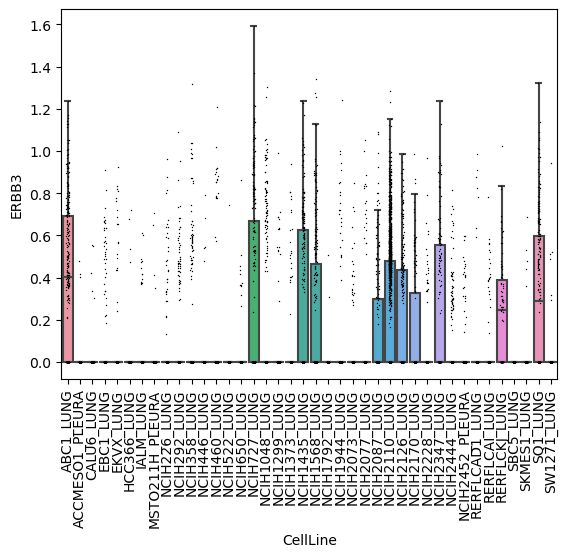

In [39]:
sns.boxplot(data=df_lung, x="CellLine", y="ERBB3", showfliers=False)
sns.stripplot(data=df_lung, x="CellLine", y="ERBB3", color="black", jitter=True, size=1)
plt.xticks(rotation=90)

/Users/maitreepatel/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


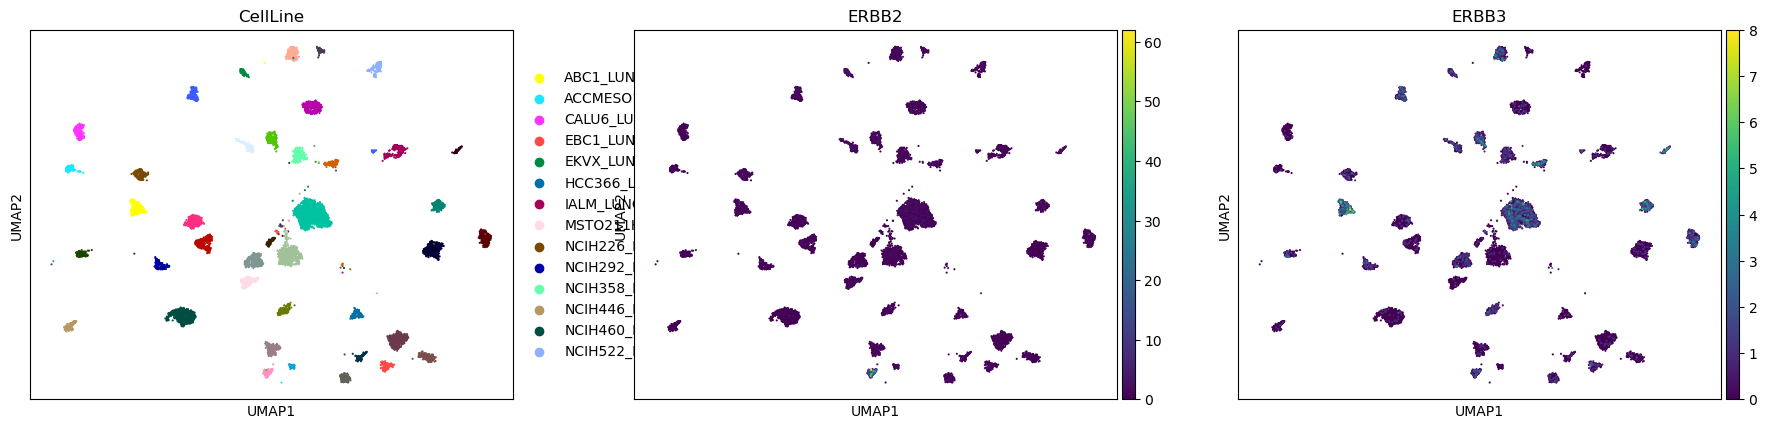

In [40]:
sc.pl.umap(adata_lung, color=["CellLine", "ERBB2", "ERBB3"])

will trastuzumab bind without the HER2-HER3 complex? Does the expression of both need to be high?

From the breast cancer cell lines, the following show high ERBB2 expression:
- BT474
- EFM192A
- HCC1419
- MDAMB361

The MKN7 cell line is highly expressed among the gastric cell lines. 

And the NCIH2170 in the lung cancer cell lines.
- This cell line is isolated from the lungs of male patients with squamous cell carcinoma

NCIH2170 overexpresses ERBB2 and therefore, HER2; trastuzumab can bind to to and inhibit its expression. 

### ERBB2 Expression among Head and Neck Cancer Cell Lines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '93VU_UPPER_AERODIGESTIVE_TRACT'),
  Text(1, 0, 'BHY_UPPER_AERODIGESTIVE_TRACT'),
  Text(2, 0, 'BICR6_UPPER_AERODIGESTIVE_TRACT'),
  Text(3, 0, 'BICR16_UPPER_AERODIGESTIVE_TRACT'),
  Text(4, 0, 'BICR31_UPPER_AERODIGESTIVE_TRACT'),
  Text(5, 0, 'BICR56_UPPER_AERODIGESTIVE_TRACT'),
  Text(6, 0, 'DETROIT562_UPPER_AERODIGESTIVE_TRACT'),
  Text(7, 0, 'JHU006_UPPER_AERODIGESTIVE_TRACT'),
  Text(8, 0, 'JHU011_UPPER_AERODIGESTIVE_TRACT'),
  Text(9, 0, 'JHU029_UPPER_AERODIGESTIVE_TRACT'),
  Text(10, 0, 'PECAPJ49_UPPER_AERODIGESTIVE_TRACT'),
  Text(11, 0, 'SCC9_UPPER_AERODIGESTIVE_TRACT'),
  Text(12, 0, 'SCC25_UPPER_AERODIGESTIVE_TRACT'),
  Text(13, 0, 'SCC47_UPPER_AERODIGESTIVE_TRACT'),
  Text(14, 0, 'SCC90_UPPER_AERODIGESTIVE_TRACT'),
  Text(15, 0, 'SNU46_UPPER_AERODIGESTIVE_TRACT'),
  Text(16, 0, 'SNU899_UPPER_AERODIGESTIVE_TRACT'),
  Text(17, 0, 'SNU1214_UPPER_AERODIGESTIVE_TRACT'),
  T

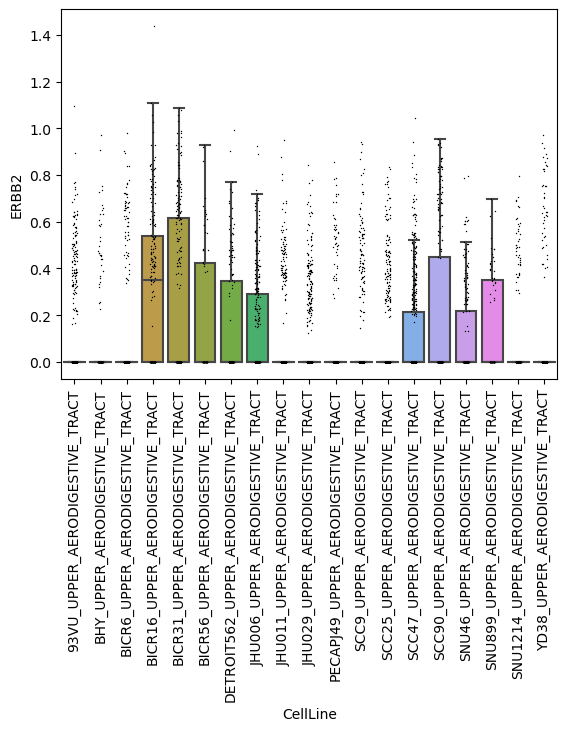

In [18]:
#checking for highly expression of ERBB2 in head and neck cancer
adata_lung = adata[adata.obs.Indication=='Head and Neck Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

## ERBB3 Expression among CellLines